# **Producción de petroleo y gas de reservorios convencionales y no convencionales** 
El siguiente dataset contiene producciones de petroleo y gas seccionado por operadora, provincia, formacion y cuenca, entre otros. 
También cuenta con valores de inyecciones de agua, gas y co2, lo que resulta interesante comparar en terminos de reservorios convencionales y no convencionales.


Fuente: https://datos.gob.ar/dataset/energia-produccion-petroleo-gas-por-pozo-capitulo-iv/archivo/energia_2f2834f4-1981-448f-9a3c-1e519d8c10cd


---

# **Importar el dataset a google collab**

Importación de librerias de pandas y seaborn, acceso al google drive y lectura del archivo energy.csv

In [ ]:
import seaborn as sns
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_original = pd.read_csv('/content/drive/My Drive/Colab Notebooks/prod.csv')

<ipython-input-7-9c27b77d4dfd>:1: DtypeWarning: Columns (0,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df_original = pd.read_csv('/content/drive/My Drive/Colab Notebooks/prod.csv')


In [ ]:
df= df_original[df_original.anio.isin([2022,2020])]
df= df[df.cuenca.isin(['NEUQUINA','CUYANA','GOLFO SAN JORGE'])]
df_neuquina= df[df.cuenca.isin(['NEUQUINA'])]
df_cuyana= df[df.cuenca.isin(['CUYANA'])]
df_sanjorge= df[df.cuenca.isin(['GOLFO SAN JORGE'])]
df

,idempresa,anio,mes,prod_pet,prod_gas,prod_agua,iny_agua,iny_gas,iny_co2,iny_ptros,...,idareapermisoconcesion,areapermisoconcesion,idareayacimiento,areayacimiento,tipo_de_recurso,proyecto,sub_tipo_recurso,cuenca,provincia,fecha_data
1411,Z001,2020,1,0.00,0.00,0.00,0.0,0.0,0.0,0.0,...,ABO,"BLANCO DE LOS OLIVOS - BLOQUE ""A""",ABO,"BLANCO DE LOS OLIVOS-BLOQUE ""A""",CONVENCIONAL,Sin Proyecto,NaN,NEUQUINA,Rio Negro,2020-01-31
1412,Z001,2020,1,0.00,0.00,0.00,0.0,0.0,0.0,0.0,...,ABO,"BLANCO DE LOS OLIVOS - BLOQUE ""A""",ABO,"BLANCO DE LOS OLIVOS-BLOQUE ""A""",CONVENCIONAL,Sin Proyecto,NaN,NEUQUINA,Rio Negro,2020-01-31
1413,Z001,2020,1,0.00,0.00,0.00,0.0,0.0,0.0,0.0,...,AGR,GENERAL ROCA,AGR,GENERAL ROCA,CONVENCIONAL,Sin Proyecto,NaN,NEUQUINA,Rio Negro,2020-01-31
1414,Z001,2020,1,0.00,0.00,0.00,0.0,0.0,0.0,0.0,...,BLLO,PUESTO SURVELIN,PUSU,PUESTO SURVELIN,CONVENCIONAL,Sin Proyecto,NaN,NEUQUINA,Rio Negro,2020-01-31
1415,Z001,2020,1,0.00,0.00,0.00,0.0,0.0,0.0,0.0,...,Z042,DON JOSE,Z122,DON JOSE,CONVENCIONAL,Sin Proyecto,NaN,NEUQUINA,Rio Negro,2020-01-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556091,ACO,2022,12,2264.02,90.54,8569.47,17786.8,0.0,0.0,0.0,...,CHA,CHAÑARES HERRADOS,CHA,CHAÑARES HERRADOS,CONVENCIONAL,Sin Proyecto,NaN,CUYANA,Mendoza,2022-12-31
556092,ACO,2022,12,473.75,28.41,628.99,0.0,0.0,0.0,0.0,...,PPCR,PUESTO POZO CERCADO ORIENTAL,PCE,PUESTO POZO CERCADO,CONVENCIONAL,Sin Proyecto,NaN,CUYANA,Mendoza,2022-12-31
556093,ACO,2022,12,0.00,0.00,0.00,0.0,0.0,0.0,0.0,...,LGU,LOMA GUADALOSA,LGU,LOMA GUADALOSA,CONVENCIONAL,Sin Proyecto,NaN,NEUQUINA,Rio Negro,2022-12-31
556094,ACO,2022,12,0.00,0.00,0.00,0.0,0.0,0.0,0.0,...,PPCR,PUESTO POZO CERCADO ORIENTAL,PCE,PUESTO POZO CERCADO,CONVENCIONAL,Sin Proyecto,NaN,CUYANA,Mendoza,2022-12-31


# Exploración general del conjunto de datos
El primer paso en el EDA es familiarizarse con el conjunto de datos. Para hacerlo, podemos utilizar algunas funciones simples de pandas:



# Shape y Types
Utilizar el método `shape` nos dá un preview del tamaño del dataset mientras que el método `dtypes` nos permite entender con que tipo de datos estámos lidiando:

In [ ]:
df.shape

(24729, 25)

In [ ]:
df.dtypes

idempresa                  object
anio                        int64
mes                         int64
prod_pet                  float64
prod_gas                  float64
prod_agua                 float64
iny_agua                  float64
iny_gas                   float64
iny_co2                   float64
iny_ptros                 float64
tef                       float64
vida_util                 float64
empresa                    object
formprod                   object
formacion                  object
idareapermisoconcesion     object
areapermisoconcesion       object
idareayacimiento           object
areayacimiento             object
tipo_de_recurso            object
proyecto                   object
sub_tipo_recurso           object
cuenca                     object
provincia                  object
fecha_data                 object
dtype: object

## Head y Tail
Podemos utilizar las funciones `head` y `tail` de pandas para ver las primeras y últimas filas del conjunto de datos, respectivamente:

In [ ]:
df.head()

,idempresa,anio,mes,prod_pet,prod_gas,prod_agua,iny_agua,iny_gas,iny_co2,iny_ptros,...,idareapermisoconcesion,areapermisoconcesion,idareayacimiento,areayacimiento,tipo_de_recurso,proyecto,sub_tipo_recurso,cuenca,provincia,fecha_data
135797,YPF,2020,1,0.00,0.00,0.00,3399.8,0.0,0.0,0.0,...,BAR,BARRANCAS,BRC,BARRANCAS,CONVENCIONAL,Sin Proyecto,NaN,CUYANA,Mendoza,2020-01-31
135798,YPF,2020,1,0.00,0.00,0.00,0.0,0.0,0.0,0.0,...,BAR,BARRANCAS,ECP,ESTRUCTURA CRUZ DE PIEDRA,CONVENCIONAL,Sin Proyecto,NaN,CUYANA,Mendoza,2020-01-31
135799,YPF,2020,1,1646.94,46.87,1508.72,0.0,0.0,0.0,0.0,...,BAR,BARRANCAS,UGA,UGARTECHE,CONVENCIONAL,Sin Proyecto,NaN,CUYANA,Mendoza,2020-01-31
135800,YPF,2020,1,0.00,0.00,0.00,0.0,0.0,0.0,0.0,...,CEF,CEFERINO,Z306,PUESTO PRIETO,CONVENCIONAL,Sin Proyecto,NaN,CUYANA,Mendoza,2020-01-31
135801,YPF,2020,1,0.00,0.00,0.00,0.0,0.0,0.0,0.0,...,LAV,LA VENTANA,ATA,ATAMISQUI,CONVENCIONAL,Sin Proyecto,NaN,CUYANA,Mendoza,2020-01-31


In [ ]:
df.tail()

,idempresa,anio,mes,prod_pet,prod_gas,prod_agua,iny_agua,iny_gas,iny_co2,iny_ptros,...,idareapermisoconcesion,areapermisoconcesion,idareayacimiento,areayacimiento,tipo_de_recurso,proyecto,sub_tipo_recurso,cuenca,provincia,fecha_data
556090,ACO,2022,12,334.68,13.39,792.94,0.0,0.0,0.0,0.0,...,CHA,CHAÑARES HERRADOS,CHA,CHAÑARES HERRADOS,CONVENCIONAL,Sin Proyecto,NaN,CUYANA,Mendoza,2022-12-31
556091,ACO,2022,12,2264.02,90.54,8569.47,17786.8,0.0,0.0,0.0,...,CHA,CHAÑARES HERRADOS,CHA,CHAÑARES HERRADOS,CONVENCIONAL,Sin Proyecto,NaN,CUYANA,Mendoza,2022-12-31
556092,ACO,2022,12,473.75,28.41,628.99,0.0,0.0,0.0,0.0,...,PPCR,PUESTO POZO CERCADO ORIENTAL,PCE,PUESTO POZO CERCADO,CONVENCIONAL,Sin Proyecto,NaN,CUYANA,Mendoza,2022-12-31
556094,ACO,2022,12,0.00,0.00,0.00,0.0,0.0,0.0,0.0,...,PPCR,PUESTO POZO CERCADO ORIENTAL,PCE,PUESTO POZO CERCADO,CONVENCIONAL,Sin Proyecto,NaN,CUYANA,Mendoza,2022-12-31
556095,ACO,2022,12,493.97,29.63,802.92,0.0,0.0,0.0,0.0,...,PPCR,PUESTO POZO CERCADO ORIENTAL,PCE,PUESTO POZO CERCADO,CONVENCIONAL,Sin Proyecto,NaN,CUYANA,Mendoza,2022-12-31


Esto nos dará una idea de cómo se ven los datos y qué tipo de información contienen.


## Descripción general del conjunto de datos
Podemos obtener una descripción general del conjunto de datos utilizando la función `describe` de pandas:

In [ ]:
df.describe()

,anio,mes,prod_pet,prod_gas,prod_agua,iny_agua,iny_gas,iny_co2,iny_ptros,tef,vida_util
count,24729.000000,24729.000000,24729.000000,24729.000000,2.472900e+04,2.472900e+04,24729.000000,24729.0,24729.0,24729.000000,2657.0
mean,2021.010312,6.506450,1137.667719,1204.421572,1.964759e+04,1.944776e+04,0.183789,0.0,0.0,490.423870,0.0
std,0.999967,3.451677,5013.688060,9261.733895,8.704532e+04,9.192685e+04,20.517356,0.0,0.0,2299.239069,0.0
min,2020.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0,0.0,0.000000,0.0
25%,2020.000000,4.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0,0.0,0.000000,0.0
50%,2022.000000,7.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0,0.0,0.000000,0.0
75%,2022.000000,10.000000,260.520000,56.000000,2.079710e+03,0.000000e+00,0.000000,0.0,0.0,119.791670,0.0
max,2022.000000,12.000000,130070.960000,181831.920000,1.058743e+06,1.364515e+06,2475.180000,0.0,0.0,47752.100000,0.0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
anio,24729.0,2021.010312,0.999967,2020.0,2020.0,2022.0,2022.00000,2.022000e+03
mes,24729.0,6.506450,3.451677,1.0,4.0,7.0,10.00000,1.200000e+01
prod_pet,24729.0,1137.667719,5013.688060,0.0,0.0,0.0,260.52000,1.300710e+05
prod_gas,24729.0,1204.421572,9261.733895,0.0,0.0,0.0,56.00000,1.818319e+05
prod_agua,24729.0,19647.594275,87045.322902,0.0,0.0,0.0,2079.71000,1.058743e+06
iny_agua,24729.0,19447.760932,91926.852001,0.0,0.0,0.0,0.00000,1.364515e+06
iny_gas,24729.0,0.183789,20.517356,0.0,0.0,0.0,0.00000,2.475180e+03
iny_co2,24729.0,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.000000e+00
iny_ptros,24729.0,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.000000e+00
tef,24729.0,490.423870,2299.239069,0.0,0.0,0.0,119.79167,4.775210e+04


In [ ]:
df.describe(include=['object'])

,idempresa,empresa,formprod,formacion,idareapermisoconcesion,areapermisoconcesion,idareayacimiento,areayacimiento,tipo_de_recurso,proyecto,sub_tipo_recurso,cuenca,provincia,fecha_data
count,24729,24729,24537,24273,24681,24681,24729,24729,24729,24729,255,24729,24729,24729
unique,28,28,37,36,144,144,479,426,3,2,2,3,5,24
top,CGC,COMPAÑÍA GENERAL DE COMBUSTIBLES S.A.,SPRI,springhill,ANG,ANTICLINAL GRANDE - CERRO DRAGON,DIA,POZOS SIN YACIMIENTO,CONVENCIONAL,Sin Proyecto,TIGHT,GOLFO SAN JORGE,Santa Cruz,2022-04-30
freq,5504,5504,5632,5632,3783,3783,384,684,24082,24225,205,11722,11096,1044


Esto nos dará algunas estadísticas básicas sobre las variables numéricas en el conjunto de datos, como el número de observaciones, la media, la desviación estándar, los valores mínimo y máximo y los percentiles.


## Información de las columnas
Podemos obtener información sobre las columnas en el conjunto de datos utilizando la función `info` de pandas:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24729 entries, 135797 to 556095
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   idempresa               24729 non-null  object 
 1   anio                    24729 non-null  int64  
 2   mes                     24729 non-null  int64  
 3   prod_pet                24729 non-null  float64
 4   prod_gas                24729 non-null  float64
 5   prod_agua               24729 non-null  float64
 6   iny_agua                24729 non-null  float64
 7   iny_gas                 24729 non-null  float64
 8   iny_co2                 24729 non-null  float64
 9   iny_ptros               24729 non-null  float64
 10  tef                     24729 non-null  float64
 11  vida_util               2657 non-null   float64
 12  empresa                 24729 non-null  object 
 13  formprod                24537 non-null  object 
 14  formacion               24273 no

Esto nos dará información sobre el número de valores no nulos en cada columna y el tipo de datos de cada columna.

In [ ]:
df.isnull().sum()

idempresa                     0
anio                          0
mes                           0
prod_pet                      0
prod_gas                      0
prod_agua                     0
iny_agua                      0
iny_gas                       0
iny_co2                       0
iny_ptros                     0
tef                           0
vida_util                 22072
empresa                       0
formprod                    192
formacion                   456
idareapermisoconcesion       48
areapermisoconcesion         48
idareayacimiento              0
areayacimiento                0
tipo_de_recurso               0
proyecto                      0
sub_tipo_recurso          24474
cuenca                        0
provincia                     0
fecha_data                    0
dtype: int64

Se observa que las columnas emporesa, formprod, formacion, idareapermisoconcesion,  areapermisoconcesion y sub_tipo_recurso presentan nulos.






# Visualización de datos
La visualización de datos es una parte importante del EDA, ya que nos permite ver patrones y relaciones que podrían no ser evidentes en una tabla de datos. seaborn ofrece una amplia gama de herramientas para la visualización de datos.

## Diagrama de dispersión (scatter plot)
Una forma común de visualizar la relación entre dos variables numéricas es mediante un diagrama de dispersión. seaborn hace que sea fácil crear un diagrama de dispersión utilizando la función scatterplot:

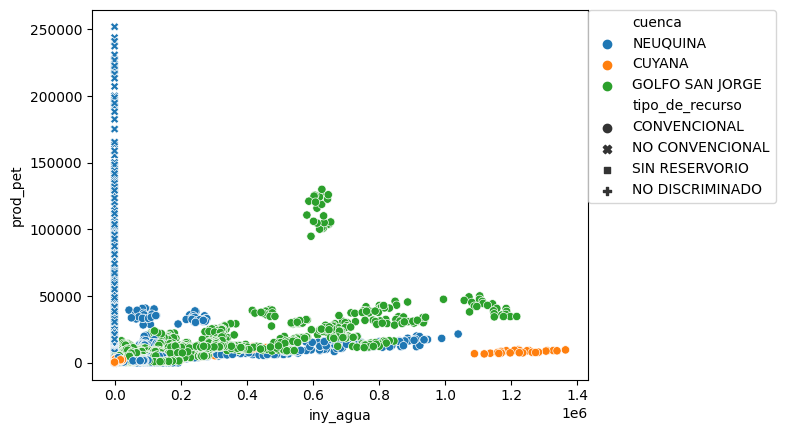

In [ ]:
import matplotlib.pyplot as plt
sns.scatterplot(x="iny_agua", y="prod_pet", data=df, hue='cuenca',style='tipo_de_recurso')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0)


A partir de este gráfico podemos ver que hay una diferencia entre los reservorios convencionales de los no convencionales (NC). Estos ultimos se distinguen de los convencionales principalmente porque para que se produzcan hidrocarburos no es necesaria la inyección de agua, si no que resultan otros los metodos para su extracción.
Los reservorios convencionales en cambio, muestran una correlación lineal entre la inyeccion de agua y la producción de petroleo. Esto es debido a que mientras se va extrayendo el hidrocarburo, la presión de extracción es cada vez menor. Pero existe justamente este metodo de recuperación mediante la inyección de agua en el reservorio, para que "empuje" en petroleo y facilite su extracción.
Respecto a las tres cuencas visibles, se ve que la unica que posee reservorios NC es la Neuquina. El comportamiento de los registros de San Jorge son similares a los de la Neuquina, pero la cuenca Cuyana necesita mayores niveles de agua para poder extraer sus recursos.

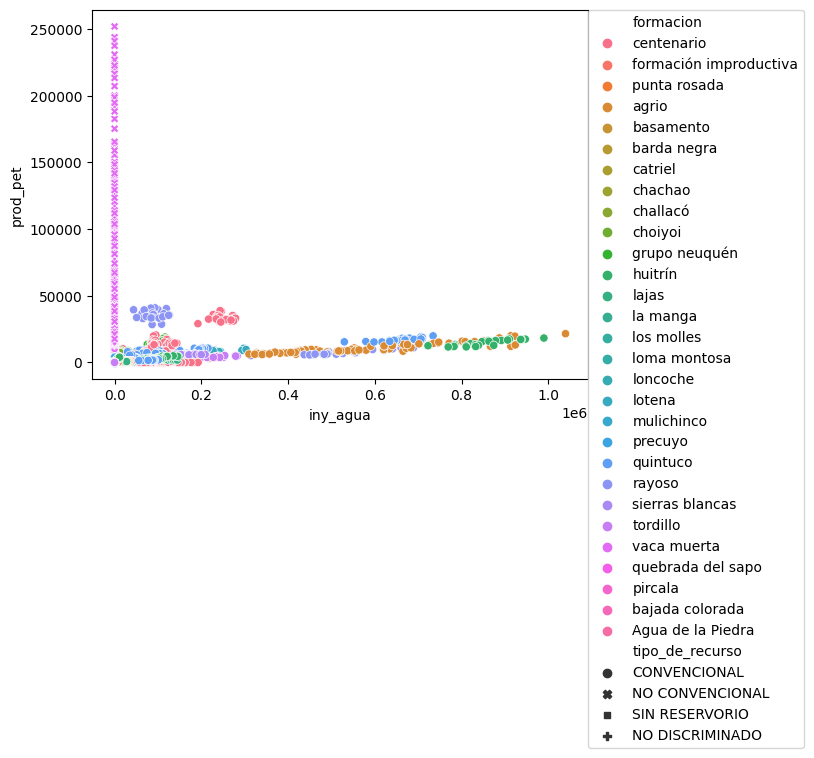

In [ ]:
import matplotlib.pyplot as plt
sns.scatterplot(x="iny_agua", y="prod_pet", data=df_neuquina, hue='formacion', style='tipo_de_recurso')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0)


Pareceria que la unica formacion no convencional que se tiene registro en el dataset es Vaca Muerta. Las demas formaciones convencionales suelen seguir el patron lineal.

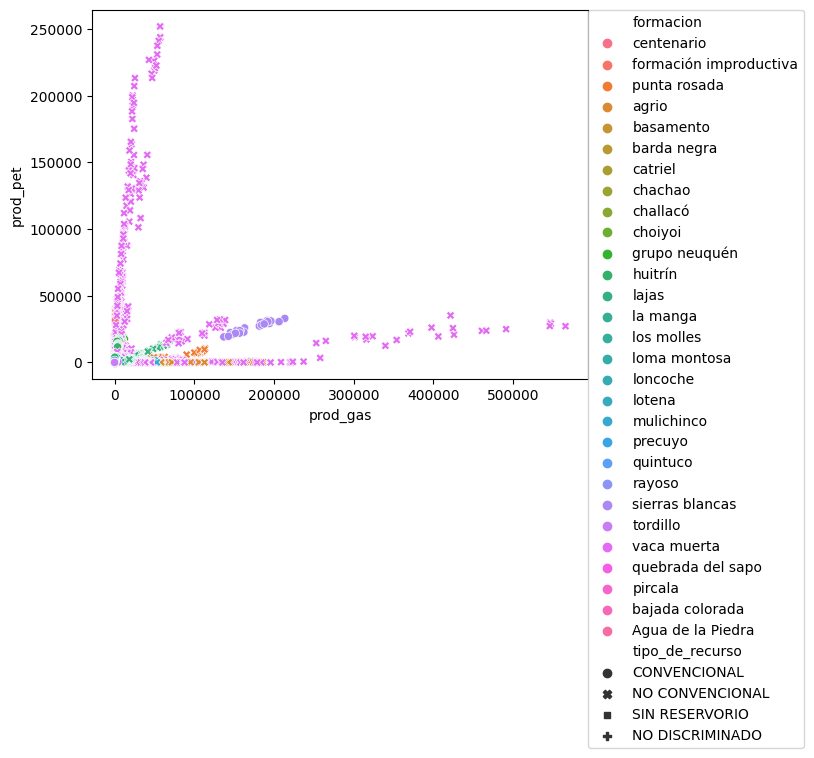

In [ ]:
import matplotlib.pyplot as plt
sns.scatterplot(x="prod_gas", y="prod_pet", data=df_neuquina, hue='formacion', style='tipo_de_recurso')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0)

Aqui podemos observar que la producción de petroleo esta en ocaciones vinculada a la producción de gas. Los mayores productores de gas son los NC. Se pueden distinguir por lo menos dos tendencias lineales. 

# Diagrama de barras (bar plot)
Otra forma común de visualizar los datos es mediante un diagrama de barras, que se utiliza para mostrar la distribución de una variable categórica. seaborn hace que sea fácil crear un diagrama de barras utilizando la función `countplot`:

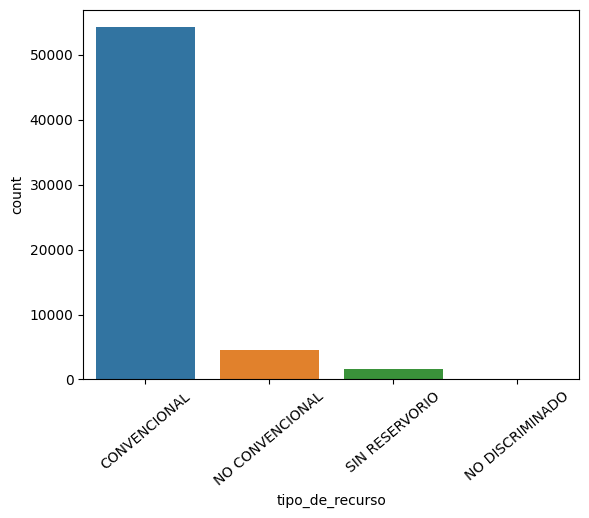

In [ ]:
##sns.countplot(x="tipo_de_recurso", data=df)
ax=sns.countplot(x="tipo_de_recurso", data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40)
plt.show()

Esto nos dará un diagrama de barras de la distribución de la variable "tipo_de_recurso" en el conjunto de datos. Podemos ver que el número de observaciones es mayor del tipo Convencional.

# Histograma (histogram)
Un histograma es una forma común de visualizar la distribución de una variable numérica. seaborn hace que sea fácil crear un histograma utilizando la función `histplot`:

<Axes: xlabel='iny_agua', ylabel='Count'>

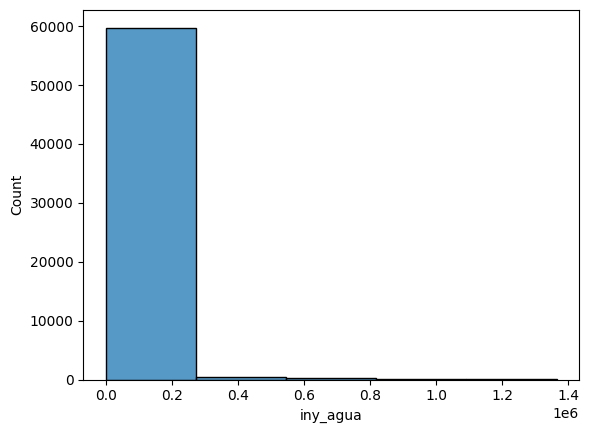

In [ ]:
sns.histplot(x="iny_agua", bins =5, data=df)

La distribución de inyección de agua está mayoritariamente entre 0 y 0.25 aproximadamente.

# Análisis de correlación
El análisis de correlación es una parte importante del EDA, ya que nos permite ver la relación entre las variables numéricas en el conjunto de datos. Una forma común de analizar la correlación es mediante el cálculo de la matriz de correlación y la visualización de la misma mediante un mapa de calor.

## Matriz de correlación (correlation matrix)
Podemos calcular la matriz de correlación utilizando la función `corr` de pandas:

In [ ]:
df.corr()

<ipython-input-79-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,anio,mes,prod_pet,prod_gas,prod_agua,iny_agua,iny_gas,iny_co2,iny_ptros,tef,vida_util
anio,1.000000,-0.000202,0.013025,0.006800,-0.000751,-0.000787,-0.011133,NaN,-0.002698,-0.002069,-0.031473
mes,-0.000202,1.000000,0.001744,-0.000721,-0.000967,-0.001147,-0.008994,NaN,-0.003171,-0.002388,-0.000474
prod_pet,0.013025,0.001744,1.000000,0.180251,0.386070,0.342225,0.030938,NaN,-0.003661,0.525194,-0.004744
prod_gas,0.006800,-0.000721,0.180251,1.000000,0.036217,0.009652,0.114844,NaN,-0.002578,0.122306,-0.003355
prod_agua,-0.000751,-0.000967,0.386070,0.036217,1.000000,0.945769,-0.000258,NaN,-0.004432,0.730355,-0.005122
iny_agua,-0.000787,-0.001147,0.342225,0.009652,0.945769,1.000000,-0.002082,NaN,-0.004204,0.703673,-0.005007
iny_gas,-0.011133,-0.008994,0.030938,0.114844,-0.000258,-0.002082,1.000000,NaN,-0.000342,0.024033,-0.000517
iny_co2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
iny_ptros,-0.002698,-0.003171,-0.003661,-0.002578,-0.004432,-0.004204,-0.000342,NaN,1.000000,-0.004578,NaN
tef,-0.002069,-0.002388,0.525194,0.122306,0.730355,0.703673,0.024033,NaN,-0.004578,1.000000,-0.004710


Esto nos dará una matriz de correlación que muestra la correlación entre todas las variables numéricas en el conjunto de datos.

# Mapa de calor (heatmap)
Podemos visualizar la matriz de correlación utilizando un mapa de calor. seaborn hace que sea fácil crear un mapa de calor utilizando la función `heatmap`:

<ipython-input-68-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

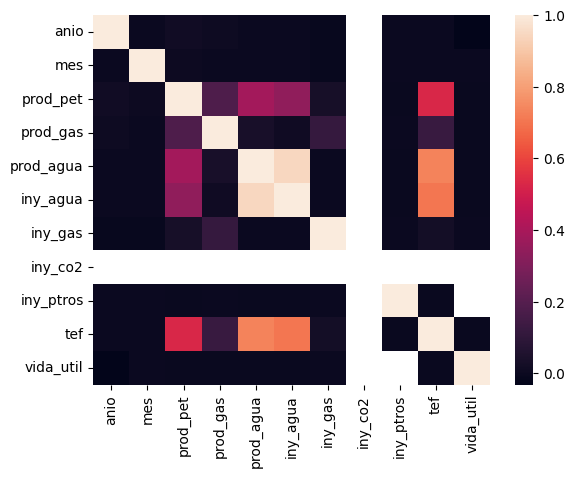

In [ ]:
sns.heatmap(df.corr())

Esto nos dará un mapa de calor que muestra la correlación entre todas las variables numéricas en el conjunto de datos. Los valores más oscuros indican una correlación más fuerte, mientras que los valores más claros indican una correlación más débil.

# Ejemplo de Análisis Exploratorio de Datos
A continuación, utilizaremos el conjunto de datos iris incluido en scikit-learn para realizar un ejemplo de Análisis Exploratorio de Datos.

## Importando librerías y cargando el conjunto de datos
Comenzamos importando las librerías necesarias y cargando el conjunto de datos:

En este ejemplo, utilizamos `load_iris` de scikit-learn para cargar el conjunto de datos `iris`. Luego, creamos un objeto `DataFrame` de pandas con los datos y agregamos una columna para el objetivo (target) del conjunto de datos.

## Explorando el conjunto de datos
Ahora, podemos comenzar a explorar el conjunto de datos utilizando las funciones que hemos discutido anteriormente:

In [ ]:
# Explorando el conjunto de datos
print(df.shape)
print(df.dtypes)
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

(60447, 25)
idempresa                  object
anio                        int64
mes                         int64
prod_pet                  float64
prod_gas                  float64
prod_agua                 float64
iny_agua                  float64
iny_gas                   float64
iny_co2                   float64
iny_ptros                 float64
tef                       float64
vida_util                 float64
empresa                    object
formprod                   object
formacion                  object
idareapermisoconcesion     object
areapermisoconcesion       object
idareayacimiento           object
areayacimiento             object
tipo_de_recurso            object
proyecto                   object
sub_tipo_recurso           object
cuenca                     object
provincia                  object
fecha_data                 object
dtype: object
     idempresa  anio  mes  prod_pet  prod_gas  prod_agua  iny_agua  iny_gas  \
1411      Z001  2020    1       0.0       0.0

Esto nos dará una idea general del conjunto de datos. Podemos ver que el conjunto de datos tiene 150 observaciones y 5 variables. No hay valores nulos en el conjunto de datos.

## Visualizando los datos
A continuación, podemos utilizar algunas de las visualizaciones discutidas anteriormente para explorar los datos:

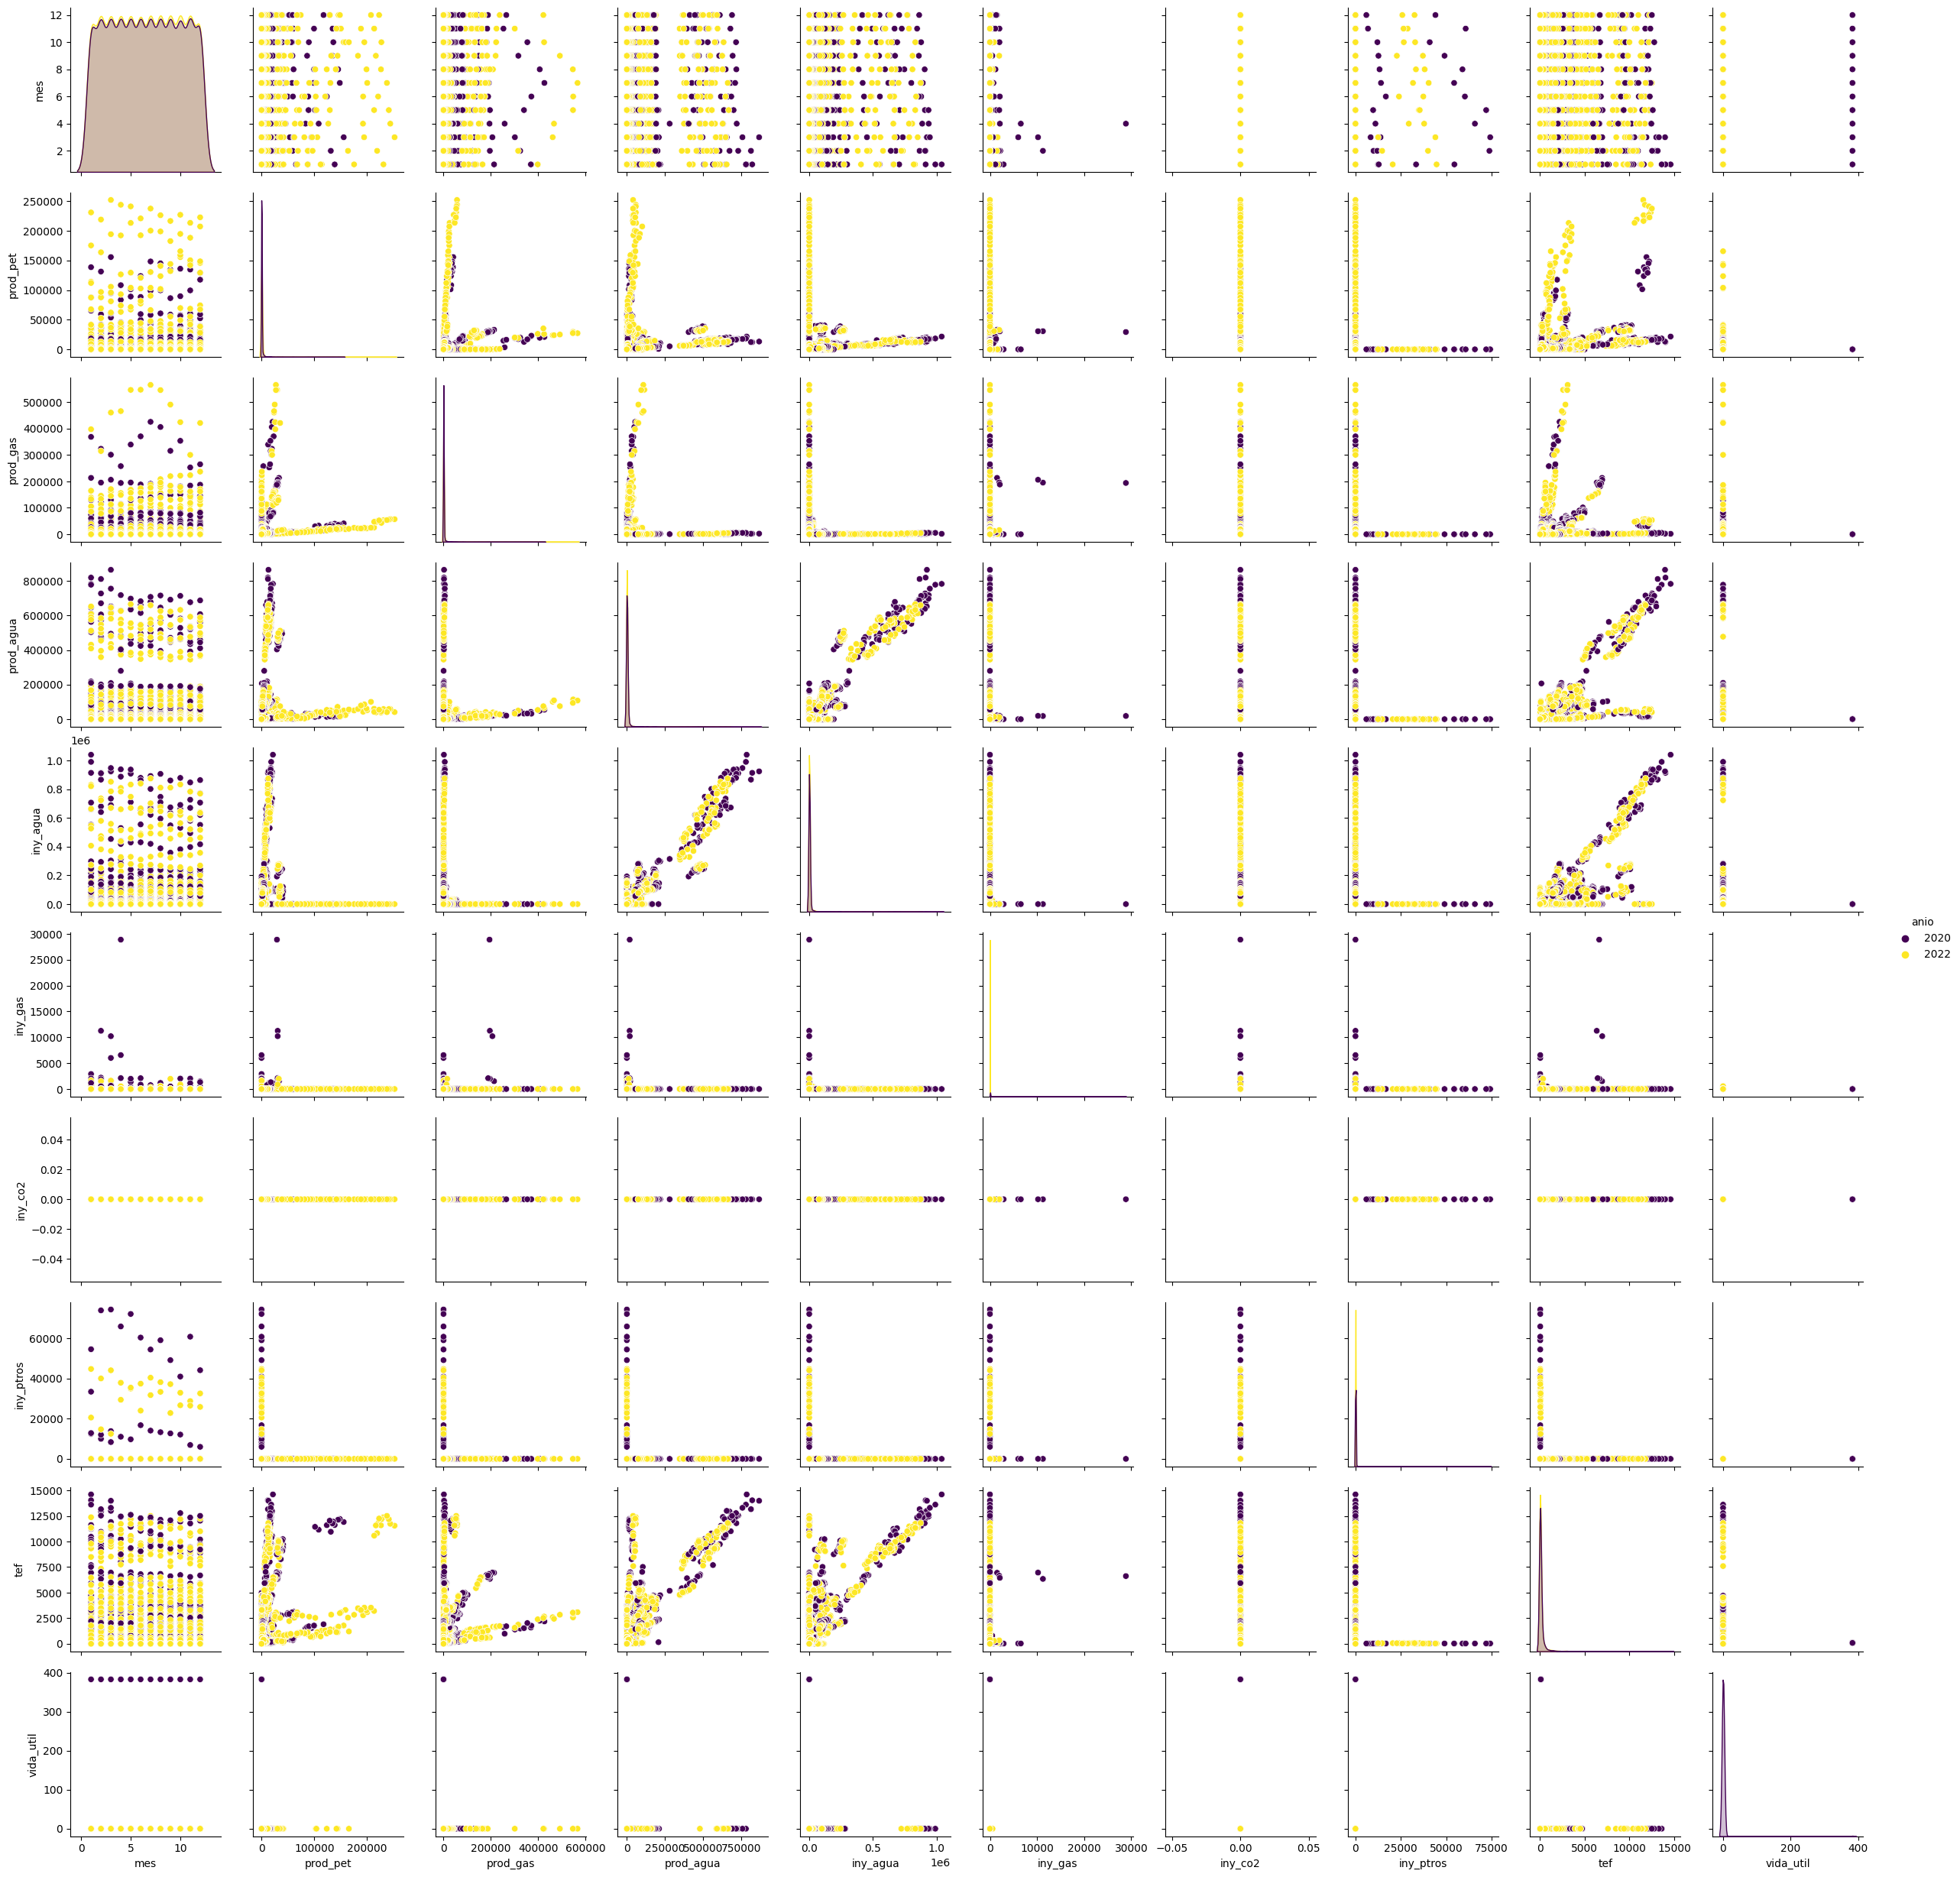

In [ ]:
# Visualizando los datos
sns.pairplot(df_neuquina, hue='anio',palette='viridis')

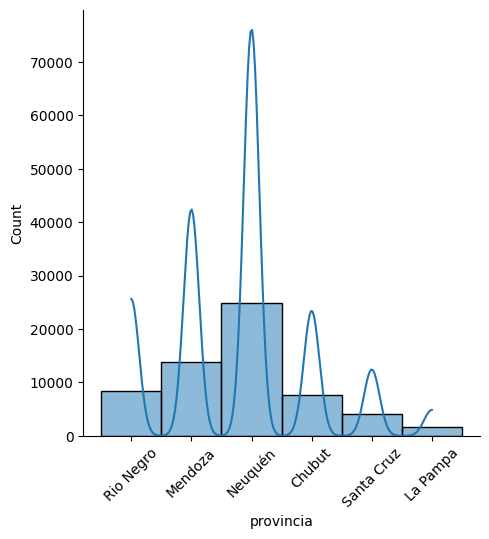

In [ ]:
a1=sns.displot(df, x='provincia',kde=True)
labels = a1.ax.get_xticklabels()
a1.set_xticklabels(labels,rotation=45)
plt.show()

La provincia dentro de las tres cuencas en tener más registros es Neuquén.

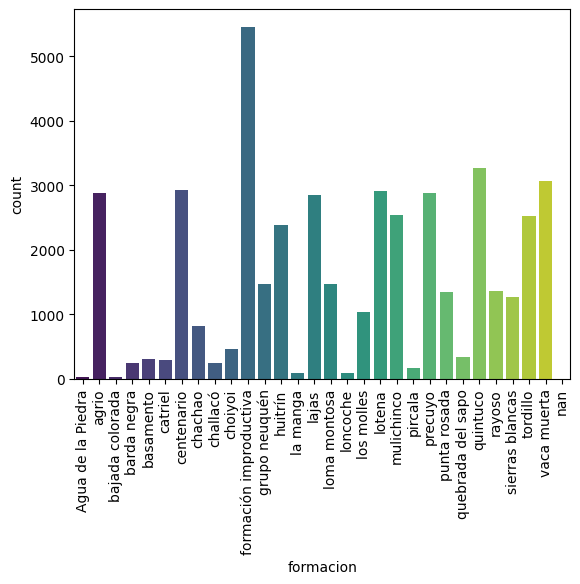

In [ ]:
order = df_neuquina['formacion'].sort_values().unique()
ax=sns.countplot(x='formacion', data=df_neuquina, palette='viridis', order=order)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

El mayor conteo de registros es cuando una formación no es productiva (no se extrajo petroleo). Entre las formaciones más destacadas se encuentran: Vaca Muerta, Agrio, Quintuco, Centenario, teniendo en cuenta solo a datos de la cuenca neuquina.

## Análisis de correlación
Finalmente, podemos utilizar `corr` de pandas y `heatmap` de seaborn para analizar la correlación entre las variables numéricas en el conjunto de datos:

<ipython-input-78-d9e97c3d970a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

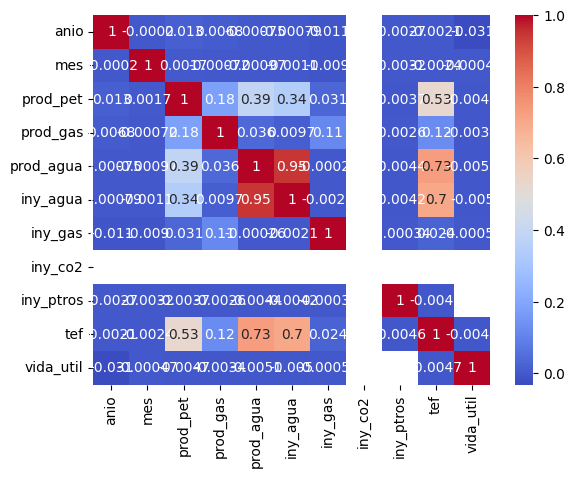

In [ ]:
# Análisis de correlación
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

Se observa una buena correlacion entre la inyección de agua y la producción de agua, probablemente porque parte de lo que se inyecta de agua termina siendo extraida con el tiempo. 
La tasa efectiva (tef) tambien esta muy correlacionada a la producción e inyección de agua, esto puede ser debido a que al inyectar agua, se incrementa la producción de hidrocarburos y por eso, las cantidades medidas producidas se acercan más a las hipoteticamente calculadas (previstas a producir).